In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Análise Exploratória dos Dados

In [2]:
df = pd.read_csv("../data/processed/reclamacoes.csv")

C:\Users\bre_p\AppData\Local\Temp\ipykernel_21660\654715174.py:1: DtypeWarning: Columns (15,18,27,28,29,30,33,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/reclamacoes.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021247 entries, 0 to 1021246
Data columns (total 49 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLID             1021247 non-null  int64  
 1   ODINO              1021247 non-null  int64  
 2   MFR_NAME           1021231 non-null  object 
 3   MAKETXT            1021231 non-null  object 
 4   MODELTXT           1021229 non-null  object 
 5   YEARTXT            1021231 non-null  float64
 6   CRASH              1021247 non-null  object 
 7   FAILDATE           1021247 non-null  int64  
 8   FIRE               1021247 non-null  object 
 9   INJURED            1021247 non-null  int64  
 10  DEATHS             1021247 non-null  int64  
 11  COMPDESC           1021227 non-null  object 
 12  CITY               1021214 non-null  object 
 13  STATE              1021247 non-null  object 
 14  VIN                946571 non-null   object 
 15  DATEA              1021247 non-n

In [4]:
df.head(10)

,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,...,RESTRAINT_TYPE,DEALER_NAME,DEALER_TEL,DEALER_CITY,DEALER_STATE,DEALER_ZIP,PROD_TYPE,REPAIRED_YN,MEDICAL_ATTN,VEHICLES_TOWED_YN
0,1029690,10558051,"General Motors, LLC",CHEVROLET,AVALANCHE 2500,2002.0,N,20131231,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,1029691,10558052,Ford Motor Company,FORD,F-350 SD,2006.0,N,20080111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,1029692,10558052,Ford Motor Company,FORD,F-350 SD,2006.0,N,20080111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,1029693,10558053,"General Motors, LLC",GMC,ACADIA,2008.0,N,20131220,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,1029694,10558054,"Chrysler (FCA US, LLC)",RAM,1500,2011.0,N,20131223,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
5,1029695,10558057,"Mercedes-Benz USA, LLC",MERCEDES BENZ,E500,2003.0,N,20131230,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
6,1029696,10558055,"Chrysler (FCA US, LLC)",JEEP,WRANGLER,2008.0,N,20121217,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
7,1029697,10558056,"Chrysler (FCA US, LLC)",JEEP,WRANGLER,2005.0,N,20131126,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
8,1029698,10558059,Honda (American Honda Motor Co.),HONDA,FIT,2009.0,N,20131118,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
9,1029699,10558060,Isuzu Motors Limited,ISUZU,ASCENDER,2005.0,N,20100101,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [5]:
df

,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,...,RESTRAINT_TYPE,DEALER_NAME,DEALER_TEL,DEALER_CITY,DEALER_STATE,DEALER_ZIP,PROD_TYPE,REPAIRED_YN,MEDICAL_ATTN,VEHICLES_TOWED_YN
0,1029690,10558051,"General Motors, LLC",CHEVROLET,AVALANCHE 2500,2002.0,N,20131231,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,1029691,10558052,Ford Motor Company,FORD,F-350 SD,2006.0,N,20080111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,1029692,10558052,Ford Motor Company,FORD,F-350 SD,2006.0,N,20080111,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,1029693,10558053,"General Motors, LLC",GMC,ACADIA,2008.0,N,20131220,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,1029694,10558054,"Chrysler (FCA US, LLC)",RAM,1500,2011.0,N,20131223,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021242,2051704,11633470,"Kia America, Inc.",KIA,SOUL,2019.0,N,20221125,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1021243,2051705,11633470,"Kia America, Inc.",KIA,SOUL,2019.0,N,20221125,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1021244,2051706,11633471,"Tesla, Inc.",TESLA,MODEL X,2018.0,N,20241220,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1021245,2051707,11633471,"Tesla, Inc.",TESLA,MODEL X,2018.0,N,20241220,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [6]:
df[['LDATE']]

,LDATE
0,2014-01-01
1,2014-01-01
2,2014-01-01
3,2014-01-01
4,2014-01-01
...,...
1021242,2024-12-31
1021243,2024-12-31
1021244,2024-12-31
1021245,2024-12-31


#### Tratamento de Valores Nulos ou Faltantes

In [8]:
df.isnull().sum()

CMPLID                     0
ODINO                      0
MFR_NAME                  16
MAKETXT                   16
MODELTXT                  18
YEARTXT                   16
CRASH                      0
FAILDATE                   0
FIRE                       0
INJURED                    0
DEATHS                     0
COMPDESC                  20
CITY                      33
STATE                      0
VIN                    74676
DATEA                      0
LDATE                      1
MILES                 406028
OCCURENCES            848011
CDESCR                    49
CMPL_TYPE                  0
POLICE_RPT_YN              1
PURCH_DT             1004786
ORIG_OWNER_YN          11686
ANTI_BRAKES_YN         11686
CRUISE_CONT_YN         11686
NUM_CYLS              881263
DRIVE_TRAIN           912787
FUEL_SYS             1007150
FUEL_TYPE             915288
TRANS_TYPE           1009031
VEH_SPEED             422437
DOT                  1016850
TIRE_SIZE            1017622
LOC_OF_TIRE   

In [9]:
df['MILES'].isnull().sum()

np.int64(406028)

In [10]:
df['MILES'].fillna(df['MILES'].median(), inplace=True)

C:\Users\bre_p\AppData\Local\Temp\ipykernel_21660\2464680709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MILES'].fillna(df['MILES'].median(), inplace=True)


In [11]:
df['MILES'].isnull().sum()

np.int64(0)

#### Analisando Features com Muito Texto

In [12]:
df['CDESCR'].dtype

dtype('O')

In [13]:
df['CDESCR'].isnull().sum()

np.int64(49)

In [14]:
# Converter todos os valores válidos para String
df['CDESCR'] = df['CDESCR'].fillna('').astype(str)

In [15]:
df['CDESCR'].isnull().sum()

np.int64(0)

In [16]:
df['CDESCR'].dtype

dtype('O')

### Tokenização e Word Count

In [17]:
def pre_processar(texto):
    # Remover números, stopwords e termos curtos
    tokens = re.findall(r'\b[a-zA-Z]{4,}\b', texto.lower())  # Palavras com >=4 letras
    return ' '.join([t for t in tokens if t not in {'unknown', 'na', 'vehicle', 'car'}])

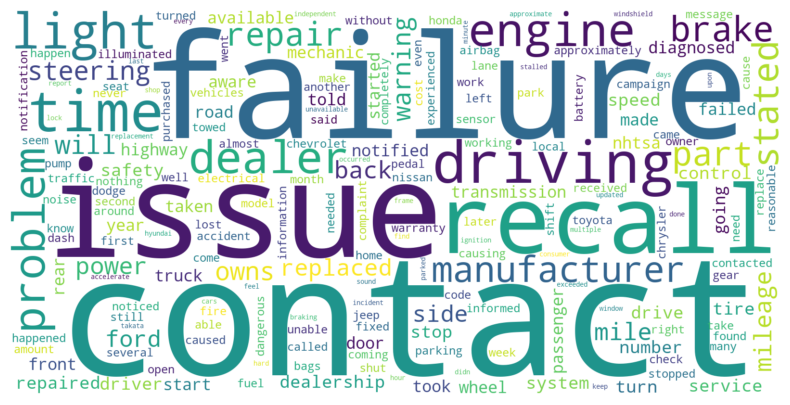

In [18]:
# fracionar o dataset para permitir a execução e não resultar em erro de memória
df_amostra = df.sample(frac=0.01, random_state=42)
df_limpo = df_amostra['CDESCR'].fillna('').astype(str).apply(pre_processar)
descricao_menor = ' '.join(df_limpo)

# Nuvem de palavras
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=200,
    background_color='white',
    collocations=False,
    scale=2
).generate(descricao_menor)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

freq_palavras = wordcloud.words_
df_freq_palavras = pd.DataFrame(freq_palavras.items(), columns=['word', 'frequency'])
df_freq_palavras = df_freq_palavras.sort_values(by='frequency', ascending=False)

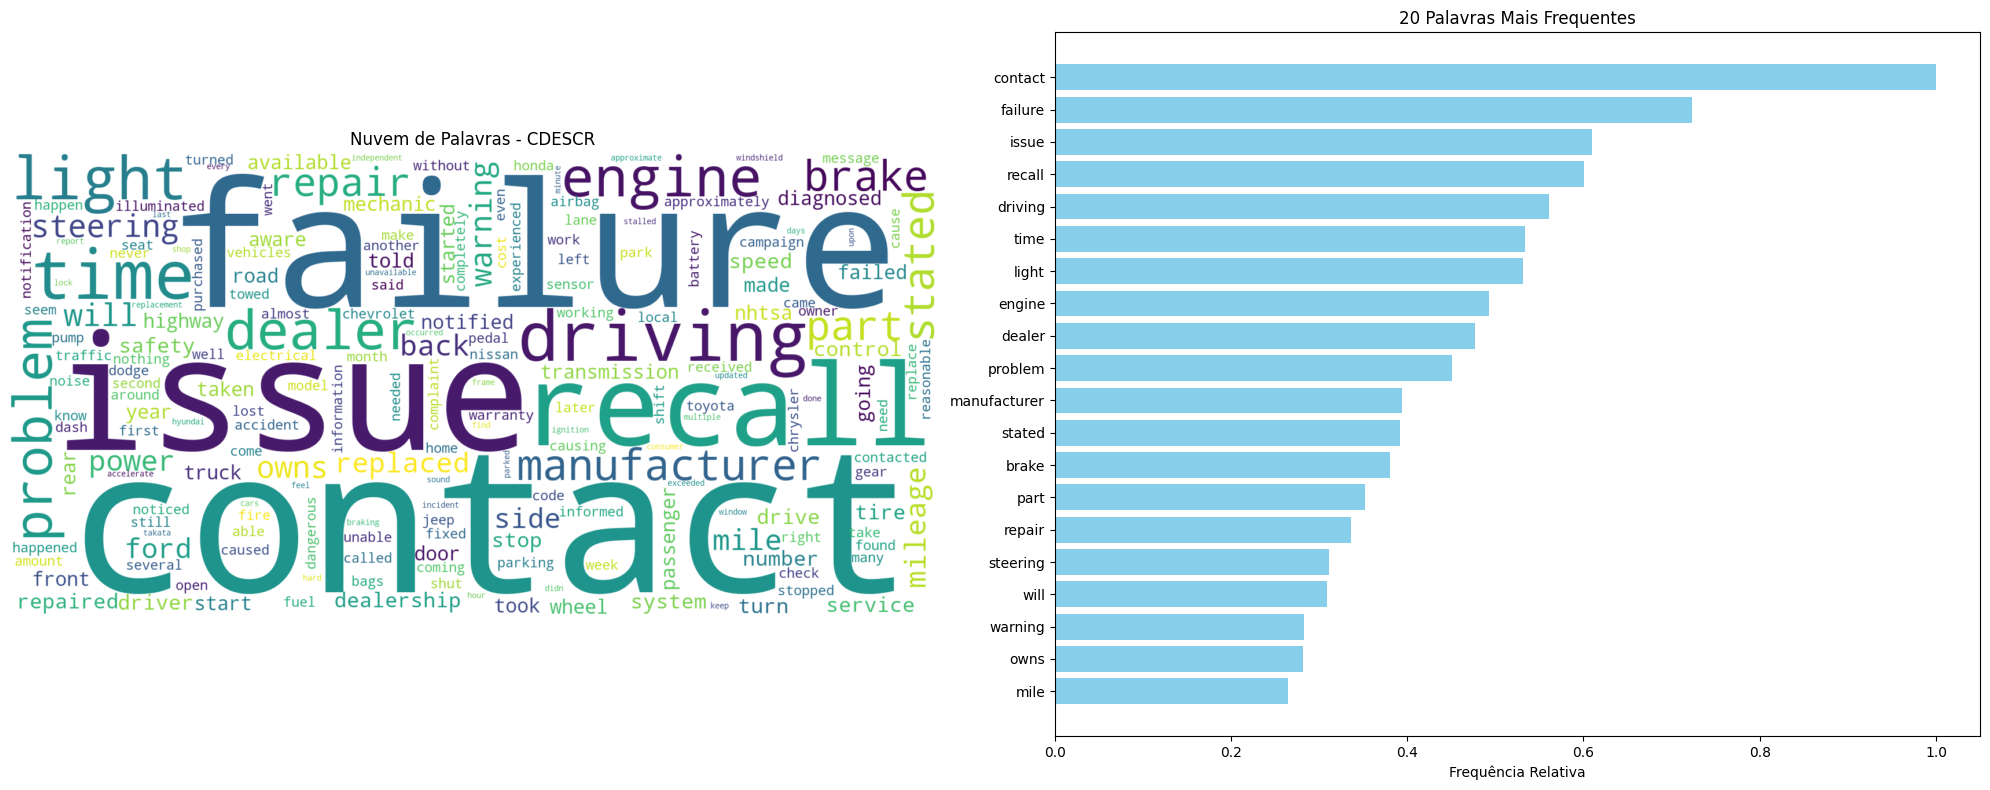

In [19]:
# Configurar subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotar nuvem de palavras
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Nuvem de Palavras - CDESCR')

# Plotar top 20 palavras (gráfico de barras)
top_words = df_freq_palavras.head(20)
ax2.barh(top_words['word'], top_words['frequency'], color='skyblue')
ax2.invert_yaxis()  # Palavra mais frequente no topo
ax2.set_title('20 Palavras Mais Frequentes')
ax2.set_xlabel('Frequência Relativa')

plt.tight_layout()
plt.show()

In [20]:
# Verificar tipos e amostra
print("Tipo da coluna CDESCR:", df['CDESCR'].dtype)
print("\nPrimeiros registros da coluna CDESCR:")
print(df['CDESCR'].head(3).to_string(index=False))

Tipo da coluna CDESCR: object

Primeiros registros da coluna CDESCR:
BRAKE PEDAL WENT TO THE FLOOR, USED EMERGENCY B...
FRONT END OF TRUCK WOBBLES-SHAKES OUT OF CONTRO...
FRONT END OF TRUCK WOBBLES-SHAKES OUT OF CONTRO...


#### Tentando encontrar o número de recalls na base de dados

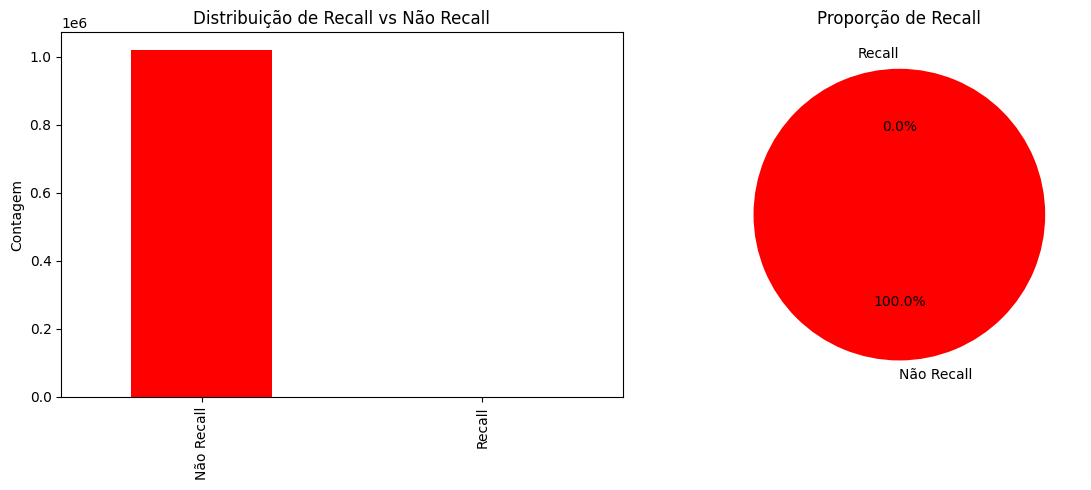

Não Recall    1021247
Recall              0
Name: count, dtype: int64


In [21]:
def count_recall(df):
    # Criar variável-alvo binária
    df['is_recall'] = df['CMPL_TYPE'].apply(lambda x: 1 if str(x).strip() in {'RC', 'RP'} else 0)
    
    # Contar ocorrências
    recall_num = df['is_recall'].value_counts().reindex([0, 1], fill_value=0)
    recall_num.index = ['Não Recall', 'Recall']
    # recall_num.columns = ['count']
    
    # Plotar distribuição
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Gráfico de barras
    recall_num.plot(kind='bar', ax=ax1, color=['red', 'green'])
    ax1.set_title('Distribuição de Recall vs Não Recall')
    ax1.set_ylabel('Contagem')
    
    total = recall_num.sum()
    # Gráfico de pizza (usando matplotlib diretamente para mais controle)
    if total > 0:  # Evitar erro se todas as contagens forem zero
        ax2.pie(
            recall_num.values, 
            labels=recall_num.index, 
            autopct='%1.1f%%', 
            colors=['red', 'green'], 
            startangle=90
        )
        ax2.set_title('Proporção de Recall')
    else:
        ax2.text(0.5, 0.5, 'Sem dados de recall', ha='center', va='center')
        ax2.axis("off")
    
    plt.tight_layout()
    plt.show()
    
    return recall_num


recall_stats = count_recall(df)
print(recall_stats)

##### Como não foram encontradas reclamações do tipo Recall Complaint (RC) ou Recall Petition(RP), terá que ser realizado uma busca em outros fields como "FIRE", "CRASH", "INJURED" e "DEATHS" para avaliar a gravidade do acidente e assim determinar a probabilidade de recall.  

In [22]:
# Tratamento de valores nulos e padronização de texto
df['CRASH'] = df['CRASH'].fillna('N').str.strip().str.upper()
df['FIRE'] = df['FIRE'].fillna('N').str.strip().str.upper()
df['INJURED'] = pd.to_numeric(df['INJURED'], errors='coerce').fillna(0)
df['DEATHS'] = pd.to_numeric(df['DEATHS'], errors='coerce').fillna(0)

In [23]:
df['CRASH'].value_counts()

CRASH
N    965833
Y     55414
Name: count, dtype: int64

In [24]:
df['CRASH'].dtype

dtype('O')

In [25]:
df['CRASH'].describe()

count     1021247
unique          2
top             N
freq       965833
Name: CRASH, dtype: object

In [26]:
df['FIRE'].value_counts()

FIRE
N    999508
Y     21739
Name: count, dtype: int64

In [27]:
df['FIRE'].describe()

count     1021247
unique          2
top             N
freq       999508
Name: FIRE, dtype: object

In [28]:
df['INJURED'].value_counts()

INJURED
0     987495
1      25428
2       5944
3       1388
4        543
5        230
6         98
7         30
10        23
8         18
9         15
15         8
20         6
99         6
12         5
30         2
11         2
14         1
25         1
50         1
38         1
60         1
40         1
Name: count, dtype: int64

In [29]:
df['INJURED'].describe()

count    1.021247e+06
mean     4.632768e-02
std      3.950003e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.900000e+01
Name: INJURED, dtype: float64

#### Calculando o Índice de Gravidade

In [30]:
# Mapear gravidade de incidentes (pesos ajustáveis)
weights = {
    'CRASH': 2,       # Acidente aumenta significativamente a severidade
    'FIRE': 3,        # Incêndio é crítico para segurança
    'INJURED': 1.5,   # Feridos indicam risco alto
    'DEATHS': 3       # Fatalidades são o indicador mais grave
}

In [31]:
df['score_severidade'] = (
    df['CRASH'].map({'Y': weights['CRASH'], 'N': 0}) +
    df['FIRE'].map({'Y': weights['FIRE'], 'N': 0}) +
    df['INJURED'] * weights['INJURED'] +
    df['DEATHS'] * weights['DEATHS']
)

#### Definindo o Target

In [32]:
threshold = np.quantile(df['score_severidade'], 0.95)
df['is_severe'] = (df['score_severidade'] >= threshold).astype(int)

print(f"Threshold de severidade: {threshold:.2f}")
print("\nDistribuição da variável-alvo:")
print(df['is_severe'].value_counts(normalize=True))

Threshold de severidade: 2.00

Distribuição da variável-alvo:
is_severe
0    0.924896
1    0.075104
Name: proportion, dtype: float64


#### Plotando Gráficos

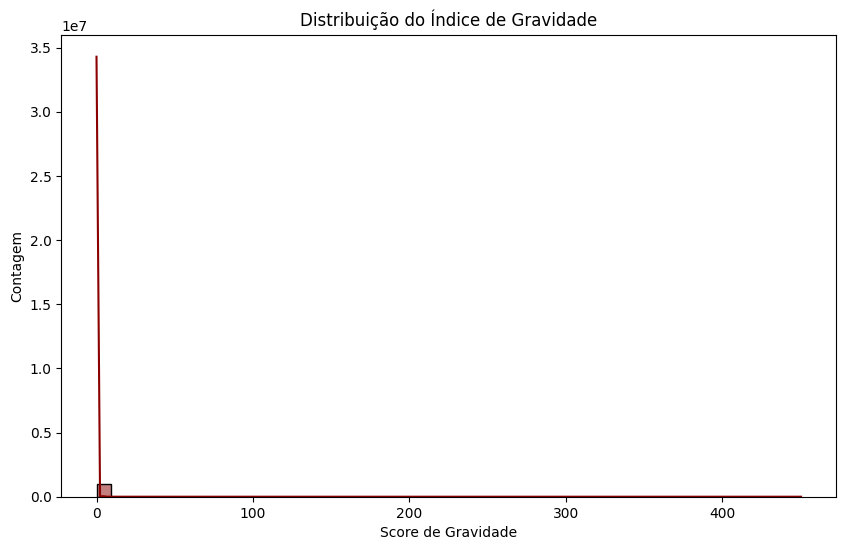

In [33]:
# A. Distribuição do score_severidade
plt.figure(figsize=(10, 6))
sns.histplot(df['score_severidade'], bins=50, kde=True, color='darkred')
plt.title('Distribuição do Índice de Gravidade')
plt.xlabel('Score de Gravidade')
plt.ylabel('Contagem')
plt.show()

In [34]:
df['MFR_NAME']

0             General Motors, LLC
1              Ford Motor Company
2              Ford Motor Company
3             General Motors, LLC
4          Chrysler (FCA US, LLC)
                    ...          
1021242         Kia America, Inc.
1021243         Kia America, Inc.
1021244               Tesla, Inc.
1021245               Tesla, Inc.
1021246               Tesla, Inc.
Name: MFR_NAME, Length: 1021247, dtype: object

C:\Users\bre_p\AppData\Local\Temp\ipykernel_21660\2219940435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


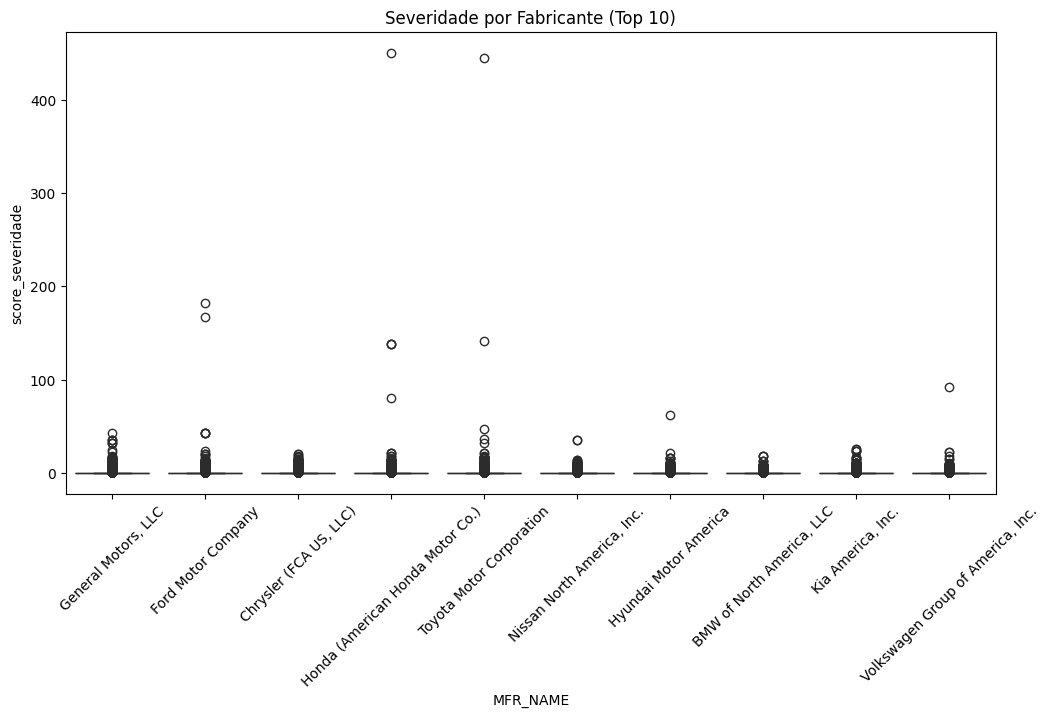

In [35]:
# B. Severidade por Fabricante (Top 10)
top_manufacturers = df['MFR_NAME'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='MFR_NAME', 
    y='score_severidade', 
    data=df[df['MFR_NAME'].isin(top_manufacturers)],
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title('Severidade por Fabricante (Top 10)')
plt.show()

C:\Users\bre_p\AppData\Local\Temp\ipykernel_21660\2740354778.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\bre_p\AppData\Local\Temp\ipykernel_21660\2740354778.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


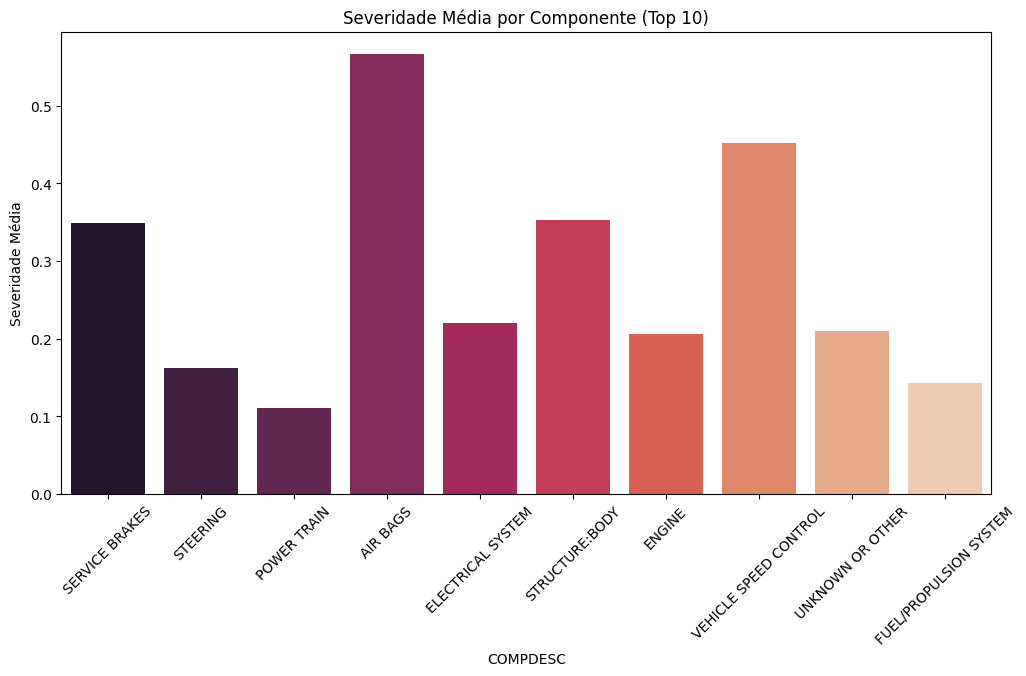

In [36]:
# C. Severidade por Componente (Top 10)
top_components = df['COMPDESC'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df[df['COMPDESC'].isin(top_components)]['COMPDESC'], 
    y=df['score_severidade'],
    estimator=np.mean,
    ci=None,
    palette='rocket'
)
plt.xticks(rotation=45)
plt.title('Severidade Média por Componente (Top 10)')
plt.ylabel('Severidade Média')
plt.show()

##### Um adendo: ao tentar salvar o DataFrame para uso em outro script ou notebook para melhor estrutura de diretórios do projeto, tive problemas com o meu hardware para criar um outro ".csv" com os dados aqui criados, como a coluna "score_severidade". Por isso, irei continuar o desenvolvimento nesse mesmo notebook. 

## Segunda Parte: Feature Engineering

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

#### Implementação do TF-IDF (pondera palavras frequentes em uma reclamação)

In [74]:
tfidf = TfidfVectorizer(
    max_features=100,      # Limita dimensionalidade
    ngram_range=(1, 2),     # Captura unigrams e bigrams
    stop_words='english'    # Remove stopwords padrão
)

X_tfidf = tfidf.fit_transform(df['CDESCR'])

In [75]:
# contagem de palavras
df['word_count'] = df['CDESCR'].astype(str).apply(lambda x: len(x.split()))

## Terceira Parte: Pipeline de Modelagem

In [76]:
# Definir colunas para cada tipo de feature
feature_texto = 'CDESCR'
features_cat = ['MFR_NAME', 'COMPDESC', 'YEARTXT', 'DRIVE_TRAIN']
feature_num = ['score_severidade', 'word_count']

In [77]:
# Pré-processador
preprocessador = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=100, lowercase=True), feature_texto),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), features_cat),
        ('num', StandardScaler(), feature_num)
    ],
    remainder='drop'  # Ignora outras colunas não especificadas
)

In [78]:
# Pipeline completo
pipeline = Pipeline([
    ('preprocessor', preprocessador),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',  # Lida com desbalanceamento
        n_estimators=100,
        random_state=42
    ))
])

In [79]:
# verificar as features após o pré-processamento
print(df[['MFR_NAME', 'COMPDESC', 'CRASH', 'FIRE']].head())

                 MFR_NAME        COMPDESC CRASH FIRE
0     General Motors, LLC  SERVICE BRAKES     N    N
1      Ford Motor Company        STEERING     N    N
2      Ford Motor Company      SUSPENSION     N    N
3     General Motors, LLC     POWER TRAIN     N    N
4  Chrysler (FCA US, LLC)       STRUCTURE     N    N


### Treinar e Avaliar o Modelo

##### Dividindo em Treino e Teste para Controle de Avaliação do Modelo

In [80]:
X = df[['CDESCR'] + features_cat + feature_num]
y = df['is_severe']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Treinar o modelo
pipeline.fit(X_train, y_train)
print("Treinamento concluído.")

MemoryError: Unable to allocate 10.0 GiB for an array with shape (816997, 1650) and data type float64

#### Infelizmente, após muitas tentativas de otimizar o treinamento do modelo, tentando diminuir o número máximo de features e o n-gram range, meu computador pessoal não consegue alocar esse espaço em sua memória. Também tentei por Colab, mas a sessão falha por conta de excesso do uso da memória do computador.